<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%90%D0%BB%D1%8C%D1%84%D0%B0_(%D0%BA%D0%BE%D0%B3%D0%BE%D1%80%D1%82%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
con = sqlite3.connect('db')
def select(sql):
  return pd.read_sql(sql,con)

In [3]:
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Propsih/test/main/data_test.csv', sep=';')

In [5]:
df = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CLIENT_ID           805821 non-null  int64  
 1   VALUE_DAY           805821 non-null  object 
 2   DIGITAL_30_CNT      711169 non-null  float64
 3   TRAN_ACTIVE_30_CNT  711169 non-null  float64
 4   OPER_ACTIVE_30_CNT  711169 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 30.7+ MB


In [6]:
df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'])

<ipython-input-6-ac06d2d7e636>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'])


In [7]:
df.isna().sum()

,0
CLIENT_ID,0
VALUE_DAY,0
DIGITAL_30_CNT,94652
TRAN_ACTIVE_30_CNT,94652
OPER_ACTIVE_30_CNT,94652


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.sample(20)

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
136498,1961519487,2021-10-31,3.0,2.0,2.0
782822,466925994,2022-02-28,7.0,3.0,5.0
768809,422266723,2022-02-28,1.0,0.0,0.0
575373,4082007119,2022-01-31,3.0,0.0,0.0
496488,1973213431,2021-12-31,1.0,0.0,0.0
569678,776949160,2022-01-31,5.0,0.0,0.0
795897,557695799,2022-02-28,4.0,1.0,1.0
583621,856388440,2022-01-31,35.0,0.0,1.0
161342,377937748,2021-10-31,31.0,24.0,24.0
569450,2543789309,2022-01-31,45.0,9.0,9.0


# 1 variant

In [10]:
df['cohort'] = df.groupby('CLIENT_ID')['VALUE_DAY'].transform('min').dt.to_period('M')

In [11]:
df['active_month'] = df['VALUE_DAY'].dt.to_period('M')

In [12]:
df_cohort = df.groupby(['cohort', 'active_month']).agg(n_customers=('CLIENT_ID', 'nunique')).reset_index(drop=False)
df_cohort

,cohort,active_month,n_customers
0,2021-09,2021-09,113265
1,2021-09,2021-10,105936
2,2021-09,2021-11,103154
3,2021-09,2021-12,100491
4,2021-09,2022-01,90529
5,2021-09,2022-02,89891
6,2021-10,2021-10,9476
7,2021-10,2021-11,7319
8,2021-10,2021-12,6997
9,2021-10,2022-01,5716


In [13]:
from operator import attrgetter

In [14]:
df_cohort['period_number'] = (df_cohort.active_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,active_month,n_customers,period_number
0,2021-09,2021-09,113265,0
1,2021-09,2021-10,105936,1
2,2021-09,2021-11,103154,2
3,2021-09,2021-12,100491,3
4,2021-09,2022-01,90529,4
5,2021-09,2022-02,89891,5
6,2021-10,2021-10,9476,0
7,2021-10,2021-11,7319,1
8,2021-10,2021-12,6997,2
9,2021-10,2022-01,5716,3


In [15]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5
cohort,,,,,,
2021-09,113265.0,105936.0,103154.0,100491.0,90529.0,89891.0
2021-10,9476.0,7319.0,6997.0,5716.0,5656.0,NaN
2021-11,6784.0,5401.0,4666.0,4293.0,NaN,NaN
2021-12,7505.0,5588.0,5394.0,NaN,NaN,NaN
2022-01,14201.0,13041.0,NaN,NaN,NaN,NaN
2022-02,5864.0,NaN,NaN,NaN,NaN,NaN


In [16]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [21]:
import matplotlib.colors as mcolors

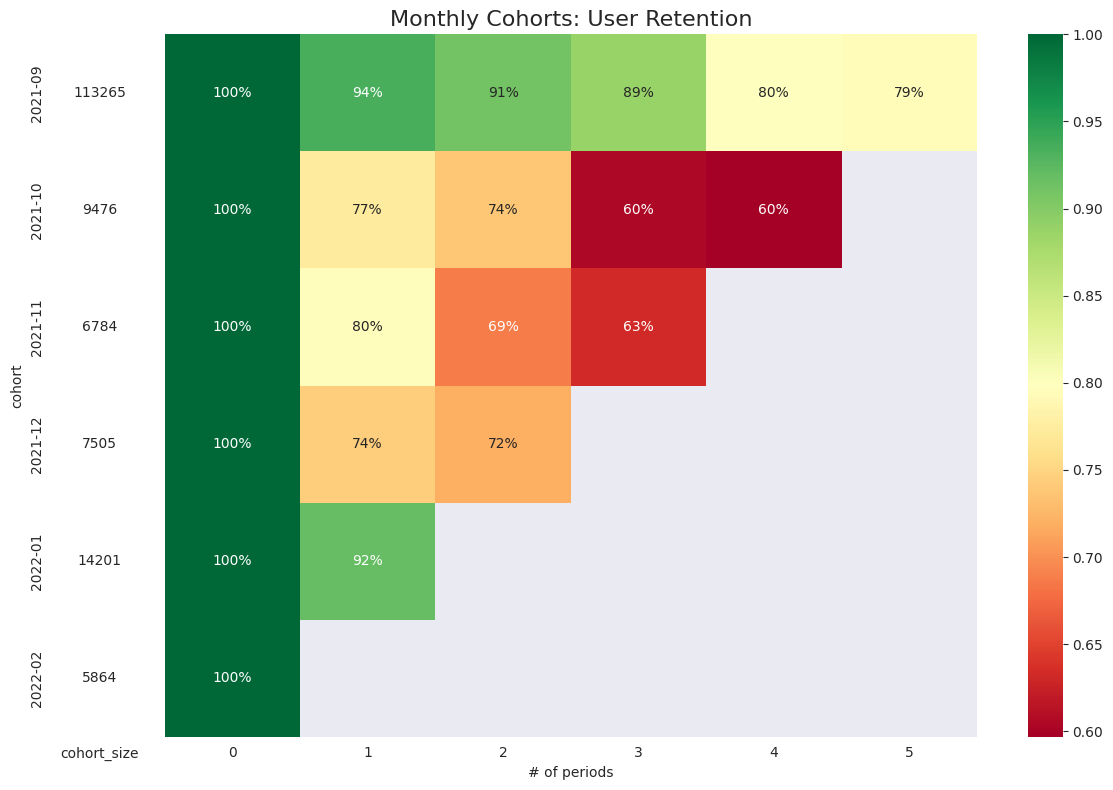

In [22]:
with sns.axes_style("dark"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

# 2 variant

In [23]:
df['cohort'] = df.groupby('CLIENT_ID')['VALUE_DAY'].transform('min').dt.to_period('M')

In [24]:
df['active_month'] = df['VALUE_DAY'].dt.to_period('M')

In [25]:
cohort_data = df.groupby(['cohort', 'active_month']).agg({
    'CLIENT_ID': 'nunique',
    'DIGITAL_30_CNT': lambda x: (x > 0).sum(),
    'OPER_ACTIVE_30_CNT': lambda x: (x > 0).sum(),
    'TRAN_ACTIVE_30_CNT': lambda x: (x > 0).sum()
}).rename(columns={
    'CLIENT_ID': 'total_clients',
    'DIGITAL_30_CNT': 'digital_active_clients',
    'OPER_ACTIVE_30_CNT': 'operational_active_clients',
    'TRAN_ACTIVE_30_CNT': 'transactional_active_clients'
}).reset_index()
cohort_data

,cohort,active_month,total_clients,digital_active_clients,operational_active_clients,transactional_active_clients
0,2021-09,2021-09,113265,112885,85414,78372
1,2021-09,2021-10,105936,105644,81774,76154
2,2021-09,2021-11,103154,102895,81701,75432
3,2021-09,2021-12,100491,100265,82961,75024
4,2021-09,2022-01,90529,90289,72788,66635
5,2021-09,2022-02,89891,89661,73789,68339
6,2021-10,2021-10,9476,9354,6334,5257
7,2021-10,2021-11,7319,7273,4882,4190
8,2021-10,2021-12,6997,6944,4979,4175
9,2021-10,2022-01,5716,5672,4086,3624


In [26]:
cohort_data['retention'] = cohort_data.groupby('cohort')['total_clients'].transform('first')
cohort_data['digital_retention'] = cohort_data['digital_active_clients'] / cohort_data['retention']
cohort_data['operational_retention'] = cohort_data['operational_active_clients'] / cohort_data['retention']
cohort_data['transactional_retention'] = cohort_data['transactional_active_clients'] / cohort_data['retention']

In [27]:
cohort_data

,cohort,active_month,total_clients,digital_active_clients,operational_active_clients,transactional_active_clients,retention,digital_retention,operational_retention,transactional_retention
0,2021-09,2021-09,113265,112885,85414,78372,113265,0.996645,0.754108,0.691935
1,2021-09,2021-10,105936,105644,81774,76154,113265,0.932715,0.721971,0.672352
2,2021-09,2021-11,103154,102895,81701,75432,113265,0.908445,0.721326,0.665978
3,2021-09,2021-12,100491,100265,82961,75024,113265,0.885225,0.732450,0.662376
4,2021-09,2022-01,90529,90289,72788,66635,113265,0.797148,0.642635,0.588311
5,2021-09,2022-02,89891,89661,73789,68339,113265,0.791604,0.651472,0.603355
6,2021-10,2021-10,9476,9354,6334,5257,9476,0.987125,0.668425,0.554770
7,2021-10,2021-11,7319,7273,4882,4190,9476,0.767518,0.515196,0.442170
8,2021-10,2021-12,6997,6944,4979,4175,9476,0.732799,0.525433,0.440587
9,2021-10,2022-01,5716,5672,4086,3624,9476,0.598565,0.431195,0.382440


In [28]:
cohort_data['active_month'] = cohort_data['active_month'].astype(str)

<Axes: xlabel='active_month', ylabel='digital_retention'>

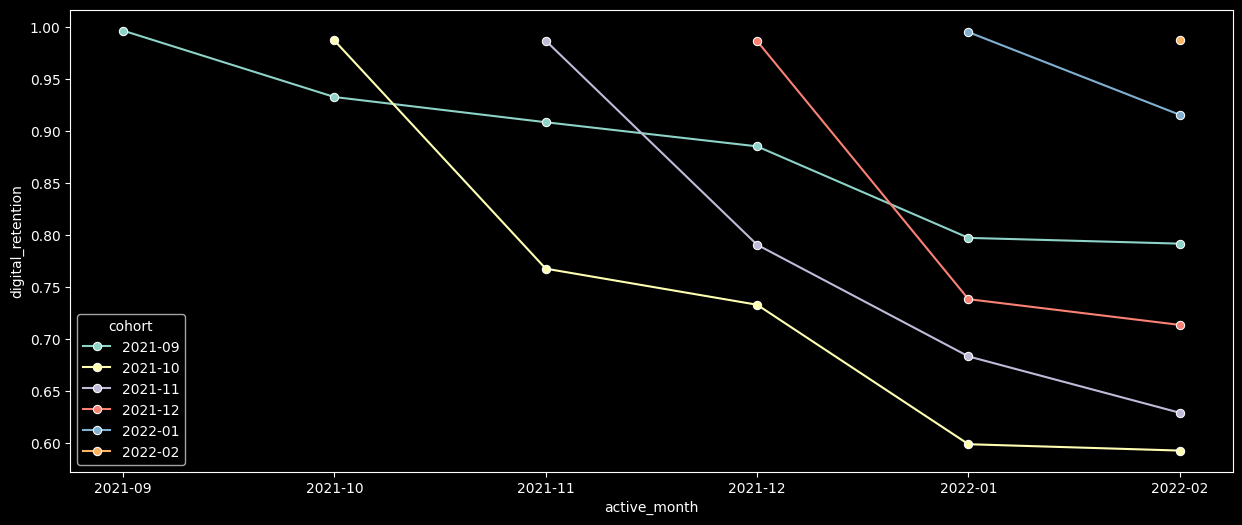

In [29]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=cohort_data, x='active_month', y='digital_retention', hue='cohort', marker='o')

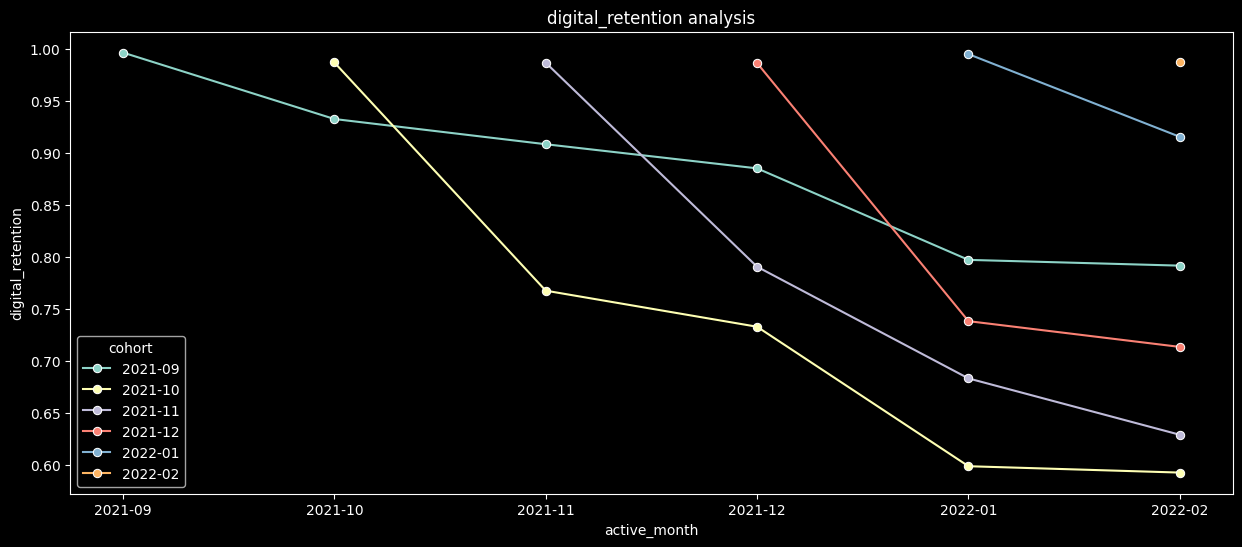

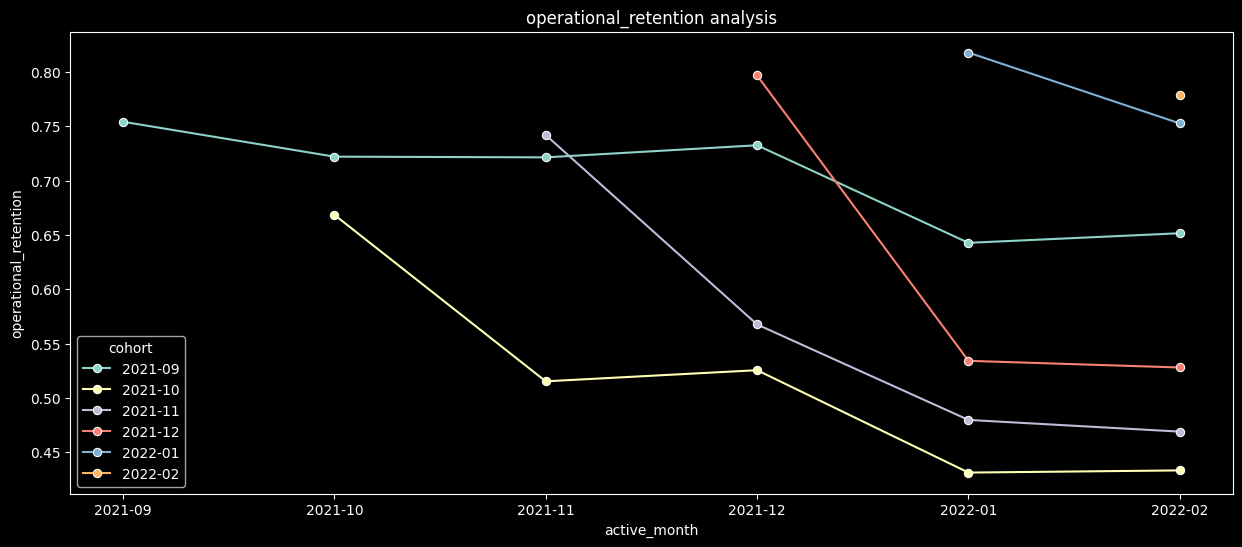

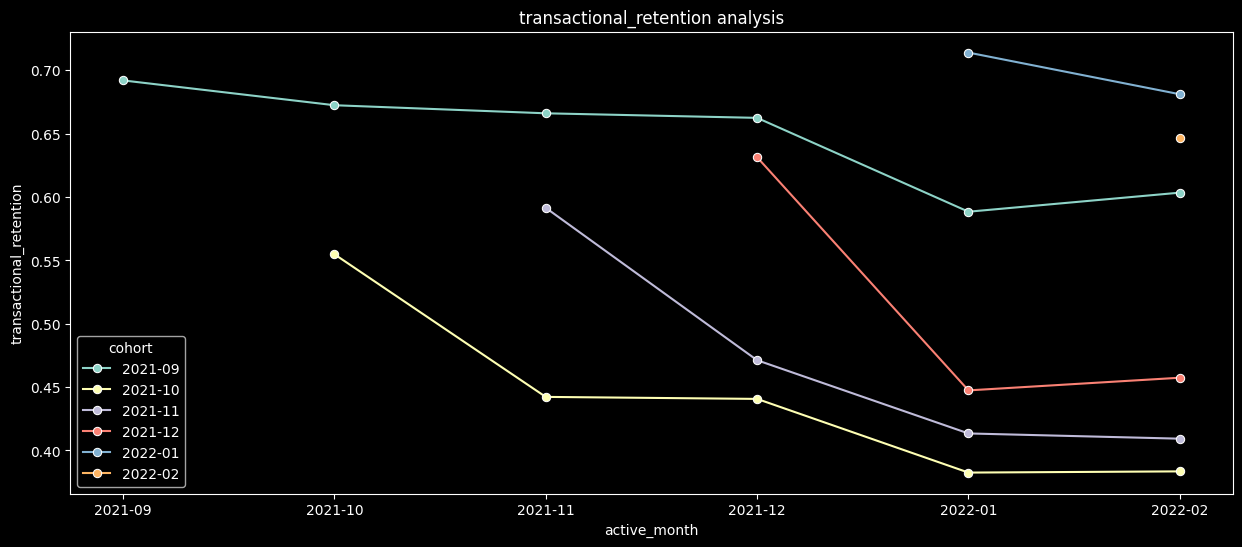

In [30]:
for i in cohort_data.columns.tolist()[7:]:
  plt.figure(figsize=(15, 6))
  sns.lineplot(data=cohort_data, x='active_month', y=i, hue='cohort', marker='o')
  plt.title(f'{i} analysis')